# **Segmentation de la clientèle d'un supermarché**

Nous avons un jeu de données portant sur les données de la clientèle d'un supermarché. Il est question pour nous de voir quelles sont les clusters ou les catégories de client qui existent dans ce supermarché afin d'améliorer l'expérience clientèle

## *Analyse exploratoire*

Commençons d'abord par faire une analyse exploratoire de nos données afin de vérifier l'existence de valuers aberrantes, valeurs manquantes, évaluer la tendance des données ou encore déterminer les relations qui existent entre les variables de notre dataset.

In [2]:
#Importation des bibliothèques appropriées

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Lecture du fichier csv

df = pd.read_csv("./Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Vérification des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Nous constatons qu'il n y'a pas de valeurs manquantes dans notre dataset, nous pouvons continuer notre analyse en cherchant l'exstence de relations entre les données, mais avant cela renommons les 02 dernières colonnes du dataframe 

In [5]:
#Renommage des 02 dernières colonnes
df.rename(columns={"Annual Income (k$)" : "Income",
                   "Spending Score (1-100)" : "Score"}, inplace= True)

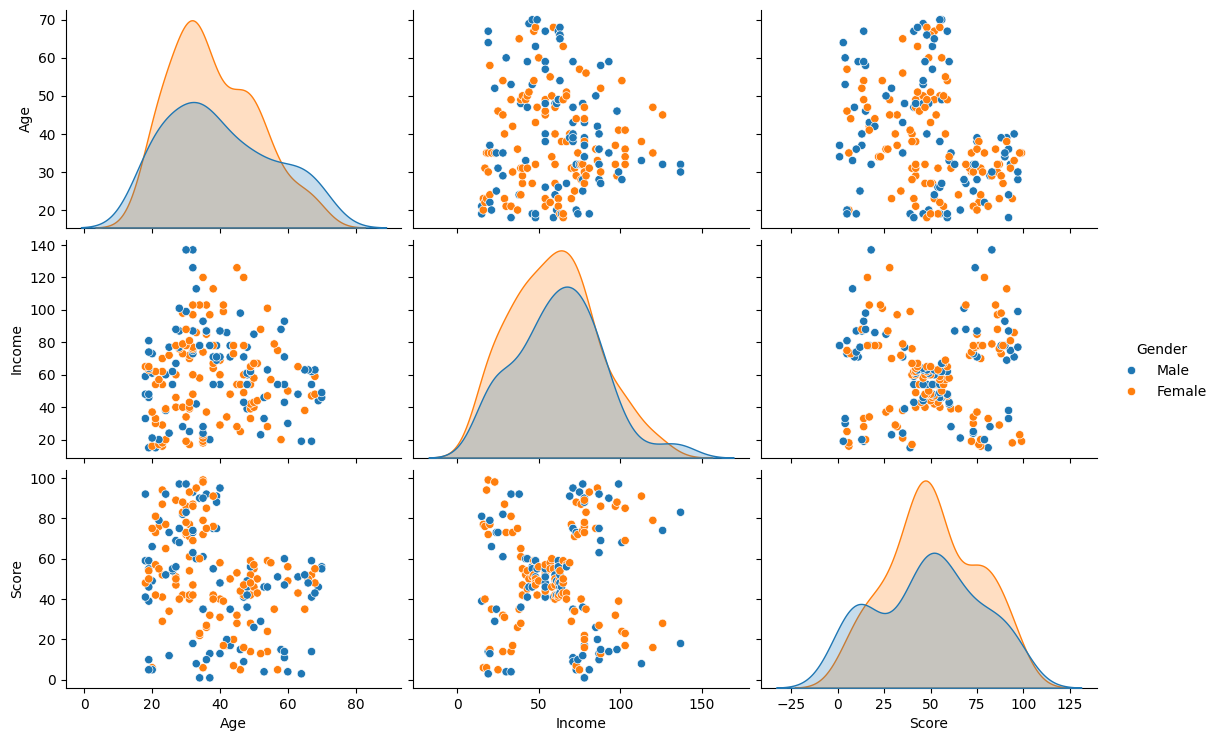

In [6]:
## Détection de relations entre les variables 
  # l'attribut hue permet de visualiser la répartition des données en fonction du genre 
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender", aspect=1.5)

Comme nous pouvons le voir, il y'a pas de relations entre la colonne genre et les autres variables. De plus, visuellement nous constatons que les données sont regroupées en fonction des revenus et des scores attribués par le supermarché à leur client.

Mais continuons notre analyse afin de détecteur un nombre approximatif de clusters des clients dans notre dataset

In [7]:
X = df.drop(["CustomerID", "Gender"], axis=1)

## Détection des clusters

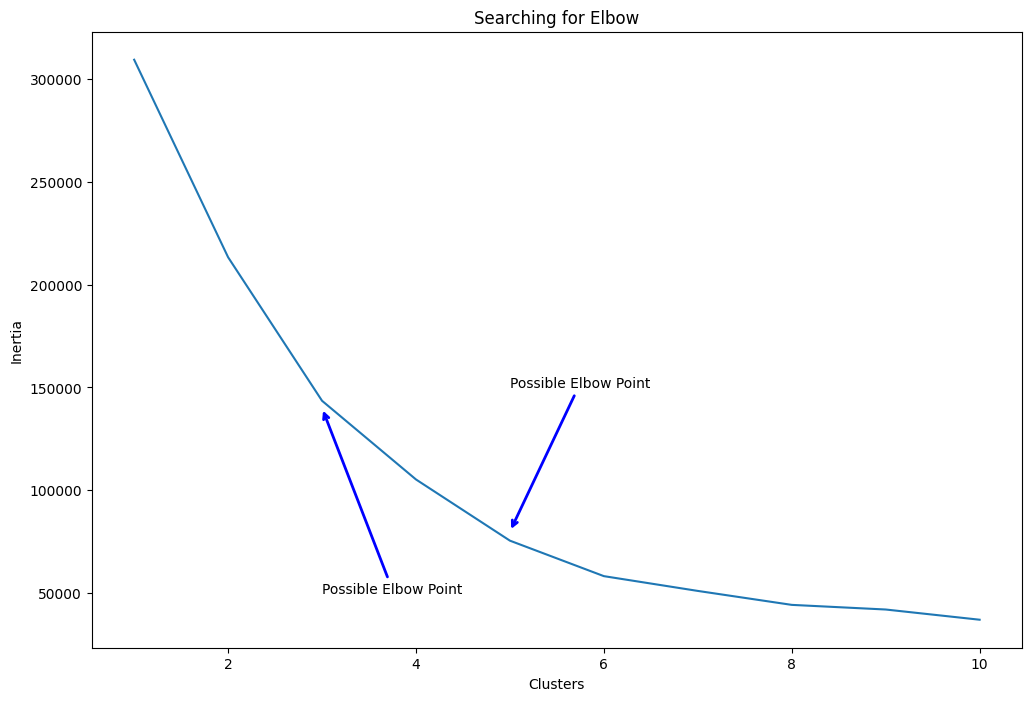

In [11]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

clusters = []

for i in range (1, 11):
    km = KMeans(n_clusters=i).fit(X)
    #inertia_ contient la somme des carrées des distances entre les données et les centres
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Suivant la technique de l'Elbow method, nous pouvons dire que les valeurs 3 et 5 peuvent être le nombre de clusters de ce jeu de données.  Pour en être sûre réalisons une visualisation

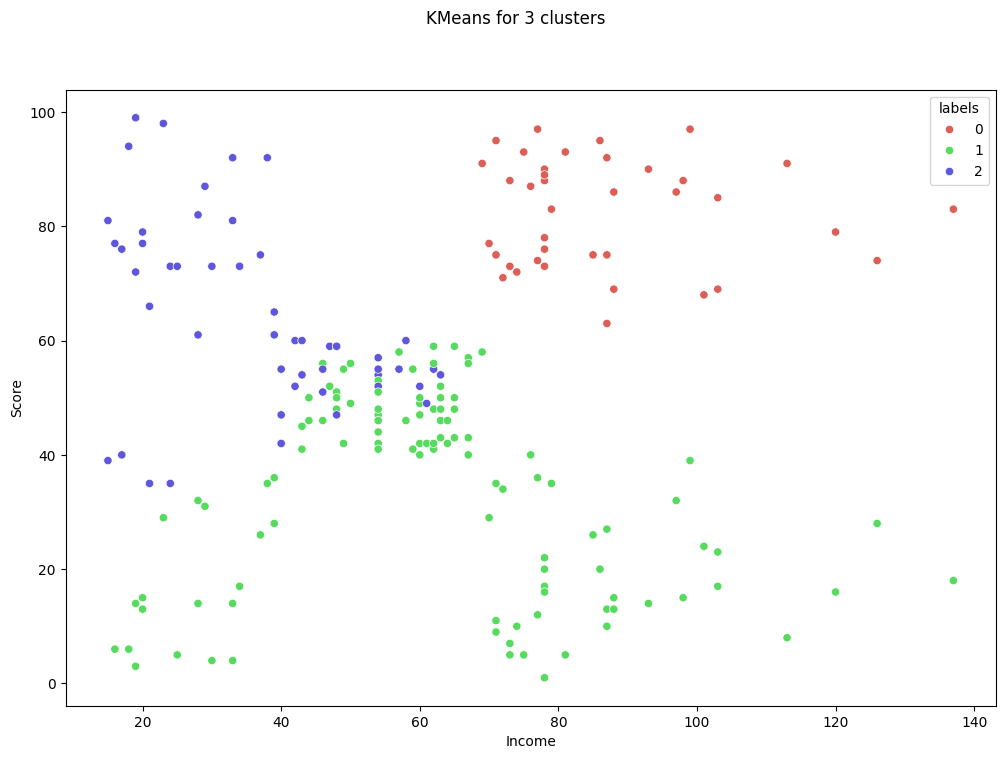

In [19]:
#clusters = 3
km3 = KMeans(n_clusters=3).fit(X)
X["labels"] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X["Income"], y=X["Score"], hue=X["labels"], palette=sns.color_palette('hls', 3))
plt.suptitle('KMeans for 3 clusters')

plt.show()

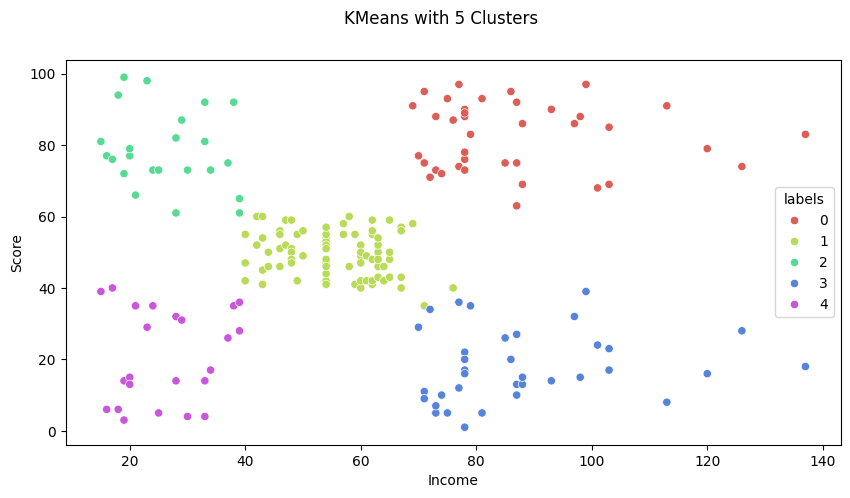

In [20]:
km5 = KMeans(n_clusters = 5).fit(X)

X["labels"] = km5.predict(X)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X["Income"], y=X["Score"], hue=X["labels"], palette=sns.color_palette('hls', 5))

plt.suptitle('KMeans with 5 Clusters')
plt.show()

Nous voyons que le nombre adéquat de clusters est 5.

### Interprétation
- label 0 : correspond aux clients ayant de grand revenu et un grand score
- label 1 : correspond aux clients ayant des revenus moyens et un score moyen
- label 2 : correspond aux clients ayant des faibles revenus et un score élevé
- label 3 : correspond aux clients ayant de grand revenu et un score bas
- label 4 : correspond aux clients ayant de faibles revenus et un score bas



Essayons à présent de représenter cela avec d'autres types de visualisations

Text(0.5, 1.0, 'Labels According to Annual Income')

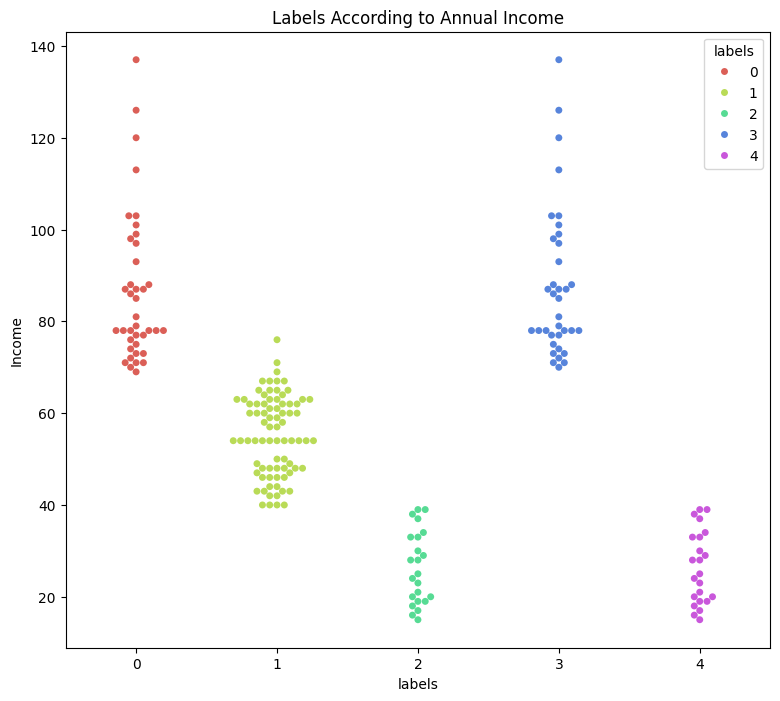

In [27]:
# Avec le swarmplot
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(121)
sns.swarmplot(x="labels", y='Income', data = X, ax=ax, hue= "labels", palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Annual Income')
